In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../Data/Spotify_with_genre.csv')

In [3]:
df.head()

,artist_name,track_name,artist_pop,popularity,release_date,genre,track_uri,artist_uri
0,A Thousand Horses,Preachin' To The Choir,37.0,0.0,2017-06-02,Rap,6JKj9seJCshLVCfBLFp7dS,55RI2GNCfyXr0f14uIdhwd
1,Water Liars,You Work Days I Work Nights,29.0,10.0,2012,dnb,7L7u4PrNt5WMtVI9lHWlLm,6k3UpifDbb2ox25edM5j3P
2,Chambao,Sera,44.0,31.0,2007-11-06,Rap,12EyOqMPMyAKlKSynICAGN,2qhLqZ1pkiUl5HNrU2Nz0R
3,Jeezy,Big Shit Poppin,69.0,19.0,2007-08-07,Rap,3tCDjKseLQJhShfbeg4m7K,4yBK75WVCQXej1p04GWqxH
4,La Arrolladora Banda El Limón De Rene Camacho,No La Voy A Engañar,74.0,54.0,2012,Rap,0UICwSsSpUt98XkeCfupFn,5bSfBBCxY8QAk4Pifveisz


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()

In [6]:
df['artist_name'] = label_encoder.fit_transform(df['artist_name'])
df['genre'] = label_encoder.fit_transform(df['genre'])

In [7]:
df['release_date']=pd.to_datetime(df['release_date'], errors='coerce')

In [8]:
df.dropna(subset=['release_date'], inplace=True)

In [9]:
df['year'] = df['release_date'].dt.year

In [10]:
df.drop(columns=['release_date'], inplace=True)

In [11]:
df.head()

,artist_name,track_name,artist_pop,popularity,genre,track_uri,artist_uri,year
0,34,Preachin' To The Choir,37.0,0.0,1,6JKj9seJCshLVCfBLFp7dS,55RI2GNCfyXr0f14uIdhwd,2017
1,2911,You Work Days I Work Nights,29.0,10.0,2,7L7u4PrNt5WMtVI9lHWlLm,6k3UpifDbb2ox25edM5j3P,2012
2,485,Sera,44.0,31.0,1,12EyOqMPMyAKlKSynICAGN,2qhLqZ1pkiUl5HNrU2Nz0R,2007
3,1268,Big Shit Poppin,69.0,19.0,1,3tCDjKseLQJhShfbeg4m7K,4yBK75WVCQXej1p04GWqxH,2007
4,1525,No La Voy A Engañar,74.0,54.0,1,0UICwSsSpUt98XkeCfupFn,5bSfBBCxY8QAk4Pifveisz,2012


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
numerical_features = ['artist_pop', 'popularity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [15]:
df.head()

,artist_name,track_name,artist_pop,popularity,genre,track_uri,artist_uri,year
0,34,Preachin' To The Choir,0.37,0.000000,1,6JKj9seJCshLVCfBLFp7dS,55RI2GNCfyXr0f14uIdhwd,2017
1,2911,You Work Days I Work Nights,0.29,0.108696,2,7L7u4PrNt5WMtVI9lHWlLm,6k3UpifDbb2ox25edM5j3P,2012
2,485,Sera,0.44,0.336957,1,12EyOqMPMyAKlKSynICAGN,2qhLqZ1pkiUl5HNrU2Nz0R,2007
3,1268,Big Shit Poppin,0.69,0.206522,1,3tCDjKseLQJhShfbeg4m7K,4yBK75WVCQXej1p04GWqxH,2007
4,1525,No La Voy A Engañar,0.74,0.586957,1,0UICwSsSpUt98XkeCfupFn,5bSfBBCxY8QAk4Pifveisz,2012


In [16]:
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [17]:
features_for_clustering = ['artist_pop', 'popularity', 'year', 'genre', ]
weights= {'artist_pop': 1, 'popularity': 2, 'year': 3, 'genre': 4, 'artist_name': 1}

df[features_for_clustering].head()

,artist_pop,popularity,year,genre
0,0.37,0.000000,2017,1
1,0.29,0.108696,2012,2
2,0.44,0.336957,2007,1
3,0.69,0.206522,2007,1
4,0.74,0.586957,2012,1


In [18]:
df['artist_pop'] = df['artist_pop']*weights['artist_pop']
df['popularity'] = df['popularity']*weights['popularity']
df['year'] = df['year']*weights['year']

In [19]:
from scipy.spatial.distance import hamming

def weighted_distance(x, y):
    num_dist = np.sqrt(
        weights['artist_pop'] * (x[0] - y[0])**2 +
        weights['popularity'] * (x[1] - y[1])**2 +
        weights['year'] * (x[2] - y[2])**2
    )
    # year_dist = hamming(x[2], y[2])
    genre_dist = hamming(x[3], y[3])
    # artist_dist = hamming(x[4], y[4])
    # genre_dist = np.count_nonzero(x[3], y[3])/len(x[3])
    # artist_dist = np.count_nonzero(x[4], y[4])/len(x[4])
    cat_dist = weights['genre']*genre_dist  #+ weights['artist_name']*artist_dist
    
    # return num_dist  + weights['genre']*genre_dist + weights['artist_name']*artist_dist
    return num_dist + cat_dist


In [1021]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2, n_jobs=-1)  

In [1171]:
# Adjust eps and min_samples as per your data
hdbscan=HDBSCAN(min_cluster_size=7,min_samples=8 , n_jobs=-1)  #metric=weighted_distance

In [1172]:
# Fit DBSCAN clustering
clusters = dbscan.fit_predict(df[features_for_clustering])

In [1173]:
hclusters=hdbscan.fit_predict(df[features_for_clustering])

In [1174]:
# Add cluster labels to dataframe
df['cluster'] = clusters
df['hcluster'] = hclusters

In [1175]:
import matplotlib.pyplot as plt

def plotClusters(col,algoName):
    for idx,i in enumerate(features_for_clustering):
        for j in features_for_clustering[idx+1:]:
            if i==j:
                continue
            plt.figure(figsize=(6, 4))
            plt.scatter(df[i], df[j], c=df[col], cmap='viridis', marker='o', alpha=0.8)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(f'{algoName} Clustering') 
            plt.colorbar(label='Cluster')
            plt.grid(True) 
            plt.show() 


In [1176]:
# plotClusters('cluster','DBSCAN')

In [1177]:
# Calculate centroid values
centroid_values = df.groupby('cluster')[features_for_clustering].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
         artist_pop  popularity         year     genre
cluster                                               
-1         0.526033    0.753742  5989.180328  3.593443
 0         0.568000    0.567944  6051.000000  1.000000
 1         0.529293    0.500000  6021.000000  1.000000
 2         0.569395    0.485449  6036.000000  1.000000
 3         0.533333    0.000000  6030.000000  0.000000
...             ...         ...          ...       ...
 230       0.595000    1.260870  5955.000000  1.000000
 231       0.595000    0.891304  6048.000000  5.000000
 232       0.610000    0.000000  5901.000000  1.000000
 233       0.275000    0.750000  6033.000000  5.000000
 234       0.445000    0.445652  6051.000000  7.000000

[236 rows x 4 columns]


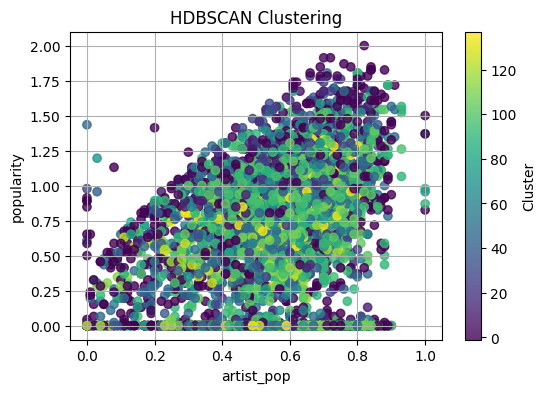

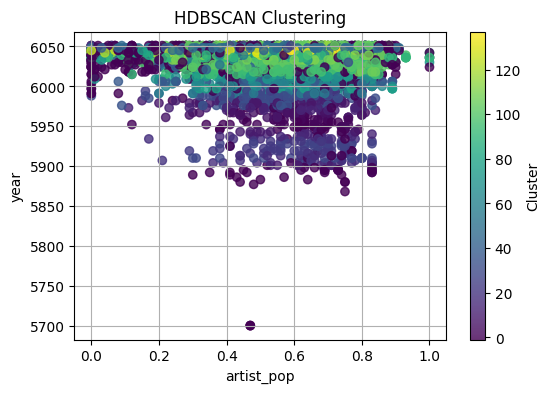

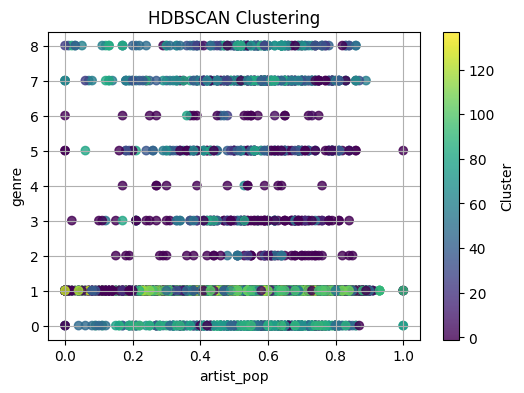

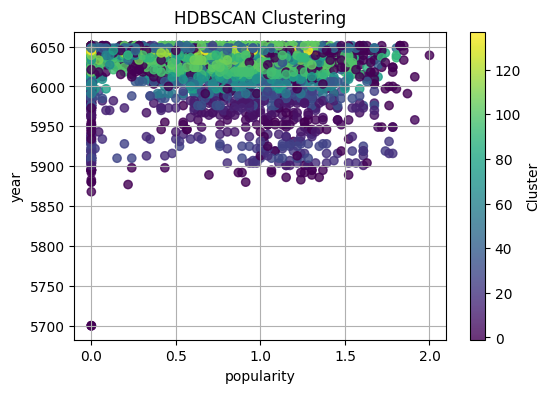

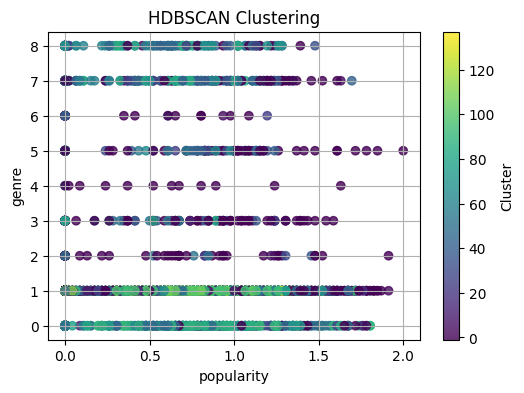

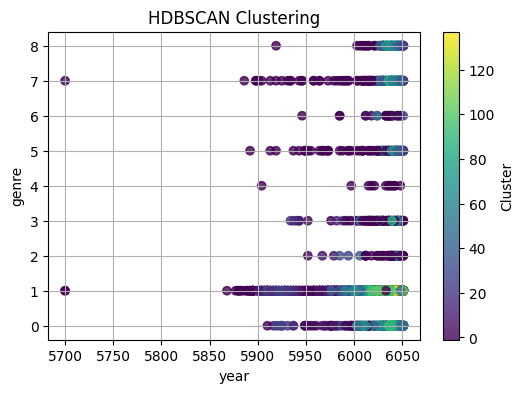

In [1178]:
plotClusters('hcluster','HDBSCAN')

In [1179]:
centroid_values = df.groupby('hcluster')[features_for_clustering].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
          artist_pop  popularity         year     genre
hcluster                                               
-1          0.502569    0.581346  6024.881944  2.001157
 0          0.677059    0.584399  5894.294118  1.000000
 1          0.533846    0.799331  5952.000000  1.153846
 2          0.616923    1.182274  5958.000000  0.923077
 3          0.707500    0.932065  5949.000000  0.625000
...              ...         ...          ...       ...
 133        0.483571    0.000000  6045.000000  1.000000
 134        0.576774    0.769986  6045.000000  1.000000
 135        0.720625    1.214674  6045.000000  1.000000
 136        0.527333    0.000000  6045.000000  1.000000
 137        0.597200    0.000000  6045.000000  1.000000

[139 rows x 4 columns]


In [1180]:
# Count the number of clusters formed
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 235


In [1181]:
num_clusters = len(set(hclusters)) - (1 if -1 in hclusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 138


Hierarchical clustering:

In [1182]:
from sklearn.cluster import AgglomerativeClustering

In [1183]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarhical_clusters = hc.fit_predict(df[features_for_clustering])

c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1184]:
#Add cluster labels to dataframe
df['hierarchical_cluster'] = hierarhical_clusters

In [1185]:
# Visualize clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(df['year'], df['popularity'], c=df['hierarchical_cluster'], cmap='viridis', marker='o', alpha=0.8)
# plt.xlabel('Year')
# plt.ylabel('Track Popularity')
# plt.title('Hierarchical Clustering')
# plt.colorbar(label='Cluster')
# plt.grid(True)
# plt.show()

# plotClusters('hierarchical_cluster','Hierarchical')

In [1186]:
# Count the number of clusters formed
num_clusters_hc = len(set(hierarhical_clusters))
print("Number of clusters formed by hierarchical clustering:", num_clusters_hc)

Number of clusters formed by hierarchical clustering: 3


In [1187]:
optics=OPTICS(min_samples=2,)  # metric=weighted_distance

In [1188]:
optics_clusters=optics.fit_predict(df[features_for_clustering])

c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [1189]:
df['ocluster'] = optics_clusters


In [1190]:
# plotClusters('ocluster','OPTICS')

In [1191]:
# Count the number of clusters formed
num_clusters_optics = len(set(optics_clusters)) - (1 if -1 in optics_clusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed by OPTICS:", num_clusters_optics)

Number of clusters formed by OPTICS: 1451


In [1192]:
# Calculate centroid values
centroid_values = df.groupby('ocluster')[features_for_clustering].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
          artist_pop  popularity         year     genre
ocluster                                               
-1          0.534741    0.622332  6025.082027  1.570567
 0          0.370000    0.000000  6051.000000  1.000000
 1          0.380000    0.000000  6051.000000  1.000000
 2          0.430000    0.000000  6051.000000  1.000000
 3          0.440000    0.000000  6051.000000  1.000000
...              ...         ...          ...       ...
 1446       0.615000    1.369565  5958.000000  7.000000
 1447       0.670000    0.905797  5933.000000  7.000000
 1448       0.725000    1.108696  5913.000000  6.000000
 1449       0.736667    1.391304  5919.000000  6.666667
 1450       0.470000    0.000000  5700.000000  3.000000

[1452 rows x 4 columns]


In [1193]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

algoNames=['DBSCAN','HDBSCAN','Hierarchical','OPTICS']
cols=['Silhouette Score', 'Davies Bouldin Score', 'Calinski Harabasz Score' ] #, 'Adjusted Rand Score', 'Homogeneity Score', 'Completeness Score', 'V Measure Score'
 
results = pd.DataFrame(columns=cols, index=algoNames)

def evalClusteringAlgo(algoName,clusters,features=features_for_clustering):
    silhouette = silhouette_score(df[features], clusters)
    davies_bouldin = davies_bouldin_score(df[features], clusters)
    calinski_harabasz = calinski_harabasz_score(df[features], clusters)
    # adjusted_rand = adjusted_rand_score(df['genre'], clusters)
    # homogeneity = homogeneity_score(df['genre'], clusters)
    # completeness = completeness_score(df['genre'], clusters)
    # v_measure = v_measure_score(df['genre'], clusters)
    results.loc[algoName] = [silhouette, davies_bouldin, calinski_harabasz] #, adjusted_rand, homogeneity, completeness, v_measure]
    
    

In [1194]:
# evalClusteringAlgo('DBSCAN',clusters)
evalClusteringAlgo('HDBSCAN',hclusters)
# evalClusteringAlgo('Hierarchical',hierarhical_clusters) 
evalClusteringAlgo('OPTICS',optics_clusters)

results.head()

,Silhouette Score,Davies Bouldin Score,Calinski Harabasz Score
DBSCAN,NaN,NaN,NaN
HDBSCAN,0.3019,2.083874,115.731645
Hierarchical,NaN,NaN,NaN
OPTICS,NaN,NaN,NaN


In [1195]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for DBSCAN
silhouette_score_dbscan = silhouette_score(df[features_for_clustering], clusters)

# Calculate silhouette score for hierarchical clustering
silhouette_score_hc = silhouette_score(df[features_for_clustering], df['hierarchical_cluster'])

silhouette_score_hdbscan = silhouette_score(df[features_for_clustering], hclusters)

silhouette_score_optics = silhouette_score(df[features_for_clustering], optics_clusters)

print("Silhouette score for DBSCAN:", silhouette_score_dbscan)
print("Silhouette score for hierarchical clustering:", silhouette_score_hc)
print("Silhouette score for HDBSCAN:", silhouette_score_hdbscan)
print("Silhouette score for OPTICS:", silhouette_score_optics)

Silhouette score for DBSCAN: 0.4218927018635793
Silhouette score for hierarchical clustering: 0.6669375630787013
Silhouette score for HDBSCAN: 0.3018997692780763
Silhouette score for OPTICS: 0.36910694587968007
